# Patient Networks from	Genomic	Data

In [1]:
import matplotlib.pyplot as plt
import networkx
import numpy as np
import pandas as pd

## Load dataframes

In [2]:
dataframes = []

for dataset in ("Gene", "Methy", "Mirna"):
    dataframe = pd.read_table(f"data/LUNG_{dataset}_Expression.tsv", header=0)

    dataframes.append(dataframe)

dataframes[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
NTS,-0.806226,-0.382872,0.401741,-1.411283,0.753000,0.736499,0.884528,-0.658622,-1.364281,-0.026033,...,1.034772,-0.702329,-1.199132,0.508934,0.970896,1.229138,0.112034,1.176520,0.344574,NaN
KRT14,1.479097,1.444322,-0.860771,-1.215284,0.393626,0.563601,0.050821,0.637788,-1.426153,-0.384999,...,1.419102,0.598151,-0.381585,0.993165,0.716151,-1.267115,-1.044408,0.583019,-0.377197,NaN
SPRR3,0.126642,1.202567,0.165575,-1.399032,-0.061173,1.229682,0.230877,1.055121,-0.371628,1.080481,...,1.181017,0.221319,-1.700355,-0.028831,0.894141,-0.121553,0.651901,-0.190551,0.994301,NaN
KRT13,1.103173,1.163743,0.068945,-0.861872,-1.101405,1.458346,-0.456045,0.360896,0.478252,1.018959,...,1.074723,0.184191,-0.222527,0.849239,0.838823,0.224248,0.346868,0.069941,-0.816551,NaN
UPK1B,-1.088276,-1.069109,0.674922,-1.130374,-1.070265,1.286183,1.492973,0.932590,0.047729,-1.082025,...,0.942833,0.586808,-0.725825,0.915616,1.189197,0.886122,1.345704,1.339203,1.064178,NaN


## Similarity matrix

### Pearson correlation

In [7]:
correlations = list(map(lambda x: x.corr(method="pearson"), dataframes))

correlations[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
,1.000000,0.104163,0.090739,0.043099,0.088210,0.067765,-0.018775,0.169102,-0.115161,-0.049865,...,0.105768,0.076377,-0.056889,0.021888,-0.196908,-0.122325,-0.190241,0.147598,-0.050254,NaN
TCGA-18-3406-01A-01R-1031-01,0.104163,1.000000,0.071621,-0.081285,-0.079021,-0.085116,0.010247,0.059097,0.012942,0.026912,...,0.184973,0.073874,0.017273,0.126482,0.078084,-0.124143,-0.122525,-0.001384,0.002215,NaN
TCGA-18-3407-01A-01R-1031-01,0.090739,0.071621,1.000000,-0.113507,0.213715,0.098169,0.040101,0.214946,-0.022260,-0.155900,...,-0.051355,0.031552,-0.068880,0.118345,0.137793,-0.100106,0.152430,0.143832,0.187454,NaN
TCGA-18-3408-01A-01R-1031-01,0.043099,-0.081285,-0.113507,1.000000,-0.010305,-0.039676,0.042845,0.017876,0.069047,0.008818,...,-0.023664,-0.010016,0.018309,-0.012011,-0.084704,-0.020772,0.046688,-0.076058,-0.067875,NaN
TCGA-18-3410-01A-01R-1031-01,0.088210,-0.079021,0.213715,-0.010305,1.000000,0.250299,-0.041417,0.324070,-0.001793,-0.036162,...,0.001635,-0.102259,-0.141535,0.068197,0.113986,-0.124554,0.102296,0.182132,0.109491,NaN


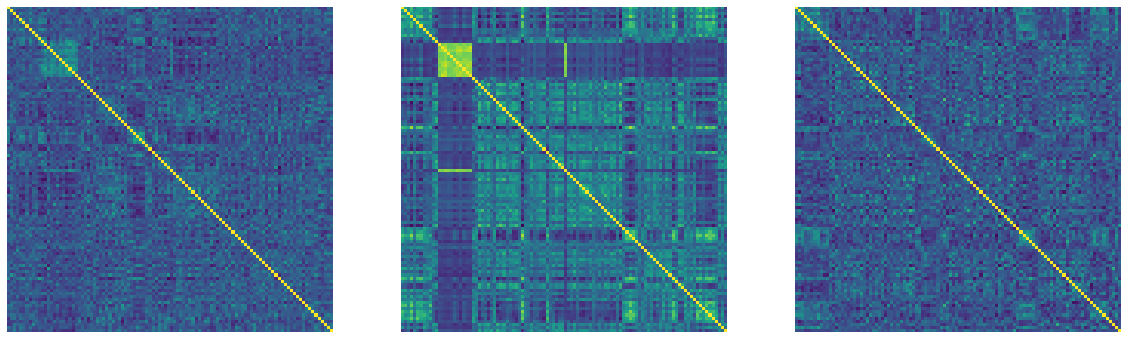

In [8]:

figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

for i, correlation in enumerate(correlations):
    axes[i].matshow(correlation)
    axes[i].set_axis_off()

plt.show()

### Spearman correlation

In [5]:
correlations_spearman = list(map(lambda x: x.corr(method="spearman"), dataframes))

correlations_spearman[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
,1.000000,0.091368,0.088455,0.046642,0.098037,0.066939,-0.021368,0.175387,-0.125901,-0.065370,...,0.109444,0.081423,-0.069437,0.029928,-0.196512,-0.141511,-0.196965,0.150866,-0.050771,NaN
TCGA-18-3406-01A-01R-1031-01,0.091368,1.000000,0.071144,-0.091847,-0.085387,-0.096808,0.023131,0.056822,0.026595,0.035791,...,0.197722,0.095962,0.041662,0.137518,0.096639,-0.130485,-0.110088,0.011846,0.012572,NaN
TCGA-18-3407-01A-01R-1031-01,0.088455,0.071144,1.000000,-0.127006,0.227974,0.112098,0.052115,0.224272,-0.015041,-0.145341,...,-0.044328,0.037654,-0.072994,0.114965,0.129533,-0.096714,0.162600,0.156693,0.195905,NaN
TCGA-18-3408-01A-01R-1031-01,0.046642,-0.091847,-0.127006,1.000000,-0.007789,-0.037834,0.044844,0.007628,0.083748,0.030553,...,-0.019767,-0.014300,0.005532,-0.007096,-0.078917,-0.008943,0.048368,-0.077682,-0.068182,NaN
TCGA-18-3410-01A-01R-1031-01,0.098037,-0.085387,0.227974,-0.007789,1.000000,0.273043,-0.043854,0.335562,0.006836,-0.035937,...,-0.000027,-0.108239,-0.158078,0.074822,0.128986,-0.112433,0.105305,0.201949,0.124299,NaN


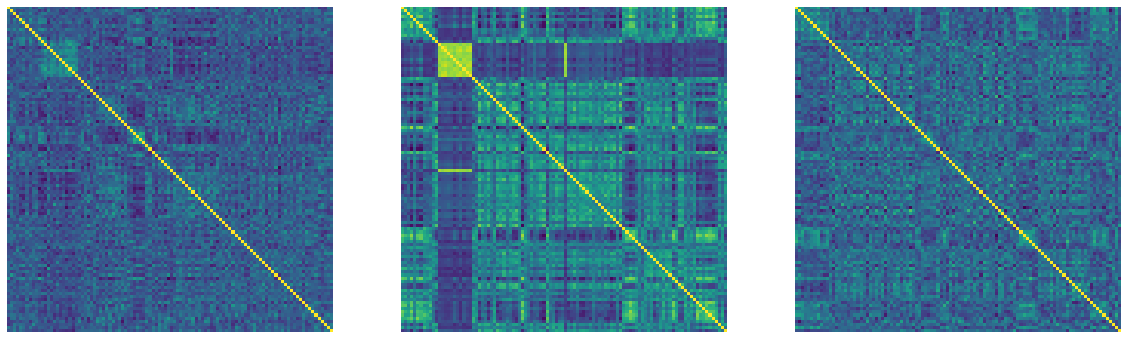

In [6]:
figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

for i, correlation_sp in enumerate(correlations_spearman):
    axes[i].matshow(correlation_sp)
    axes[i].set_axis_off()

plt.show()

## Threshold by correlation

### Pearson correlation

In [67]:
threshold = 0.3

for i, correlation in enumerate(correlations):    
    correlations[i] = correlation[abs(correlation) >= threshold]

correlations[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3406-01A-01R-1031-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3407-01A-01R-1031-01,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3408-01A-01R-1031-01,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3410-01A-01R-1031-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.32407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


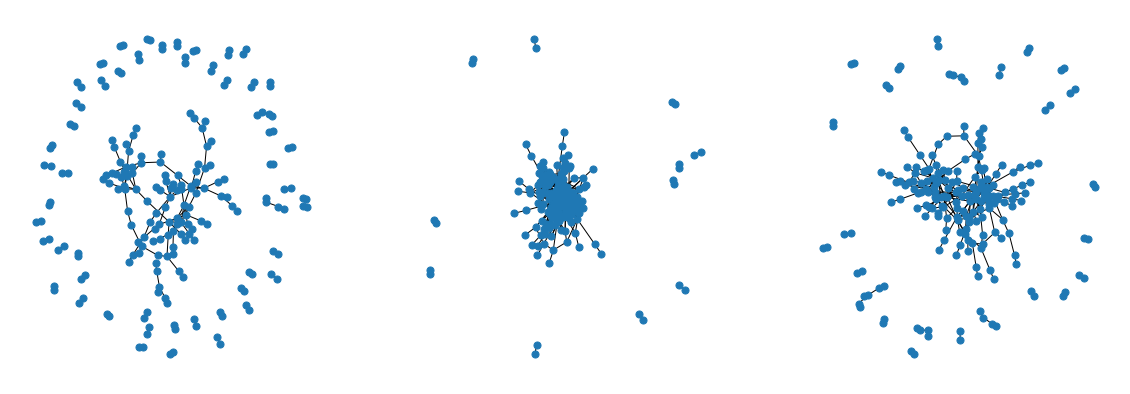

In [68]:
figure, axes = plt.subplots(1, 3, figsize=(20, 7))

def generate_network(correlation):
    graph = networkx.Graph()

    for i, row in correlation.iterrows():
        for j, value in enumerate(row[:i]):
            if not np.isnan(value):
                graph.add_edge(i, j, weight=abs(value))

    return graph

for i, correlation in enumerate(correlations):
    graph = generate_network(correlation)
    networkx.draw(graph, node_size=50, ax=axes[i])

    axes[i].set_axis_off()

plt.show()

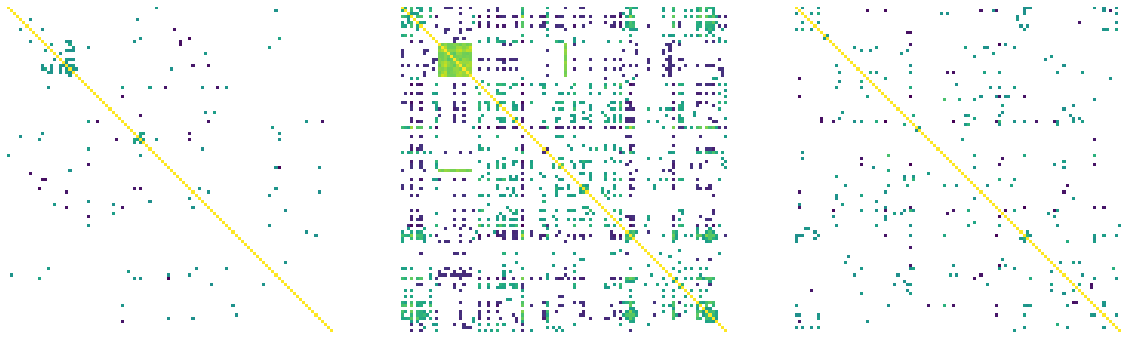

In [69]:
figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

for i, correlation in enumerate(correlations):
    axes[i].matshow(correlation)
    axes[i].set_axis_off()

plt.show()

### Spearman Correlation

In [9]:
threshold = 0.3

for i, correlation_sp in enumerate(correlations_spearman):    
    correlations_spearman[i] = correlation_sp[abs(correlation_sp) >= threshold]

correlations_spearman[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3406-01A-01R-1031-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3407-01A-01R-1031-01,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3408-01A-01R-1031-01,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-18-3410-01A-01R-1031-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.335562,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


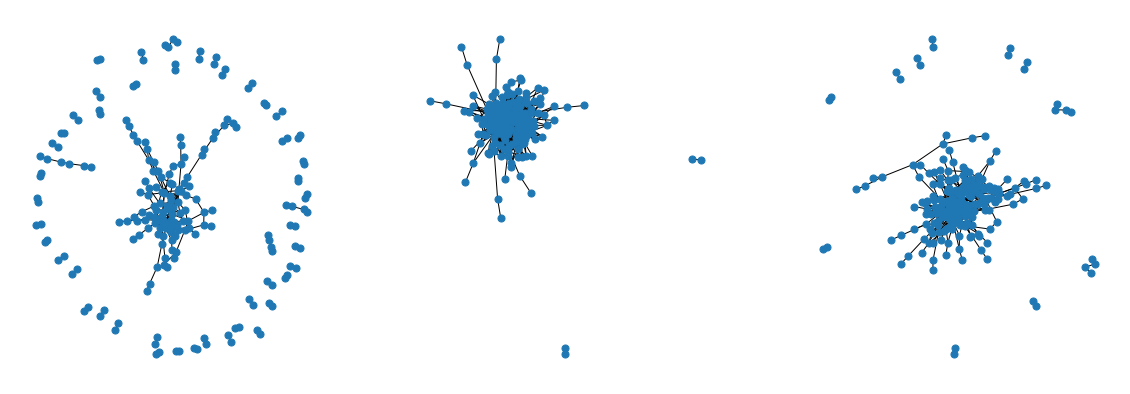

In [10]:
figure, axes = plt.subplots(1, 3, figsize=(20, 7))

def generate_network(correlation):
    graph = networkx.Graph()

    for i, row in correlation.iterrows():
        for j, value in enumerate(row[:i]):
            if not np.isnan(value):
                graph.add_edge(i, j, weight=abs(value))

    return graph

for i, correlation_sp in enumerate(correlations_spearman):
    graph = generate_network(correlation_sp)
    networkx.draw(graph, node_size=50, ax=axes[i])

    axes[i].set_axis_off()

plt.show()

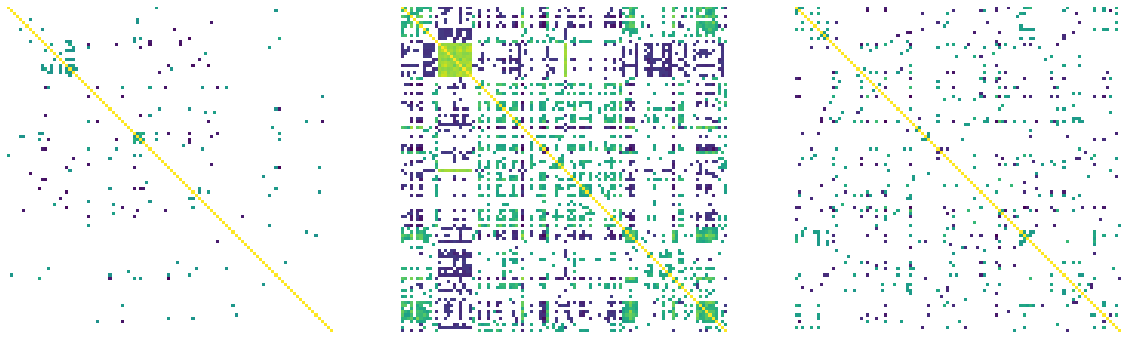

In [11]:
figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

for i, correlation_sp in enumerate(correlations_spearman):
    axes[i].matshow(correlation_sp)
    axes[i].set_axis_off()

plt.show()